# Example Notebook For Using Optimizer Tools

In [1]:
import pandas as pd

from fps_dfs_optimizer.src.draftkings_tools import get_players_from_salaries
from fps_dfs_optimizer.src.generator import LineupGenerator

In [2]:
df_players = get_players_from_salaries('../data/raw/xDKSalaries_20210103_Night.csv')

In [3]:
df_players.head()

,Name,ID,Position,Salary,Game,Time,TeamAbbrev,projections,std,min_exp,max_exp,dk_points_actual
0,Jalen Brunson,16087676,PG,3300,DAL @ CHI,2021-01-03 20:00:00,DAL,26.37,9.102,0,0.7,49.25
1,Thaddeus Young,16087476,PF,3900,DAL @ CHI,2021-01-03 20:00:00,CHI,23.79,6.504,0,0.4,14.50
2,Trey Burke,16087570,PG/SG,3400,DAL @ CHI,2021-01-03 20:00:00,DAL,19.67,9.228,0,0.5,15.50
3,Robert Covington,16087537,PF,5000,POR @ GS,2021-01-03 20:30:00,POR,24.50,8.373,0,0.5,14.00
4,Zach LaVine,16087604,SG,7300,DAL @ CHI,2021-01-03 20:00:00,CHI,39.97,9.222,0,0.6,59.50


# Lineup Generator and Optimizer
Now we'll use a more complex lineup generation --> monte carlo simulation then select the lineups that have the highest likelihood of being a high scoring team.

<br> The default values are:
<br> var_multiple = 0.5 (we weight lineup projected variance at half the importance of the projected mean)
<br> drop_fraction = 0.5 (half the players are discarded each iteration of generation)
<br> time_limit = 1 (1 second is allowed for each optimization iteration)
<br> duplicates_lim = 100 (once 100 duplicate lineups have been generated, it kills the generator)

In [4]:
gen = LineupGenerator(
    df_players,  
    batch_size=30, 
    drop_fraction=0.3, 
    duplicates_lim=2000, 
    time_limit=2, 
    verbose=False
)

## Now run the generator by giving a target number of generated lineups:

In [5]:
gen.generate(gen_time=0.1)
# gen.df_lineups = pd.read_csv('../data/raw/test_lineups.csv', index_col=0)
# gen.lineup_cov = pd.read_csv('../data/raw/test_lineup_cov.csv', index_col=0)
# gen.df.index = gen.df.Name

0 infeasible and 9 redundant lineups dropped during sorting


Elapsed time: 0.04 minutes
Lineups created: 14
Duplicates removed: 0


0 infeasible and 0 redundant lineups dropped during sorting


Elapsed time: 0.08 minutes
Lineups created: 40
Duplicates removed: 0


0 infeasible and 0 redundant lineups dropped during sorting


Elapsed time: 0.09 minutes
Lineups created: 59
Duplicates removed: 0


0 infeasible and 12 redundant lineups dropped during sorting


Elapsed time: 0.13 minutes
Lineups created: 72
Duplicates removed: 0




,PG,SG,SF,PF,C,G,F,UTIL,salary
0,Jalen Brunson,Tim Hardaway Jr.,Dorian Finney-Smith,Jae Crowder,Jusuf Nurkic,Stephen Curry,Otto Porter Jr.,Damian Lillard,50000
1,Jalen Brunson,Zach LaVine,Dorian Finney-Smith,Thaddeus Young,Serge Ibaka,Stephen Curry,Otto Porter Jr.,Damian Lillard,49800
2,Jalen Brunson,Zach LaVine,James Johnson,Thaddeus Young,Jusuf Nurkic,Stephen Curry,Otto Porter Jr.,Damian Lillard,50000
3,Stephen Curry,Zach LaVine,Dorian Finney-Smith,Otto Porter Jr.,Serge Ibaka,Tim Hardaway Jr.,Robert Covington,Jusuf Nurkic,50000
4,Jalen Brunson,Zach LaVine,Josh Richardson,Dorian Finney-Smith,Jusuf Nurkic,Paul George,Robert Covington,Damian Lillard,49700
...,...,...,...,...,...,...,...,...,...
67,Trey Burke,Zach LaVine,Josh Richardson,Carmelo Anthony,Wendell Carter Jr.,Tim Hardaway Jr.,Kawhi Leonard,CJ McCollum,49800
68,Trey Burke,Zach LaVine,Josh Richardson,Dorian Finney-Smith,Wendell Carter Jr.,Stephen Curry,Jae Crowder,Damian Lillard,50000
69,Trey Burke,Zach LaVine,Kawhi Leonard,Dorian Finney-Smith,Serge Ibaka,Tim Hardaway Jr.,Carmelo Anthony,Stephen Curry,49700
70,CJ McCollum,Tim Hardaway Jr.,Josh Richardson,Carmelo Anthony,Serge Ibaka,Damian Lillard,Robert Covington,Wendell Carter Jr.,50000


In [6]:
gen.df_lineups = gen.df_lineups.iloc[:1000]

In [7]:
gen.update_exp('../data/raw/DKSalaries_20201230_Night.csv')
gen.generate(1000)

0 Infeasible lineups dropped
20 Lineups
0 Duplicates
0 Infeasible lineups dropped
40 Lineups
0 Duplicates
0 Infeasible lineups dropped
58 Lineups
1 Duplicates
0 Infeasible lineups dropped
76 Lineups
2 Duplicates
0 Infeasible lineups dropped
93 Lineups
3 Duplicates
0 Infeasible lineups dropped
113 Lineups
3 Duplicates
1 Infeasible lineups dropped
132 Lineups
3 Duplicates
0 Infeasible lineups dropped
151 Lineups
4 Duplicates
0 Infeasible lineups dropped
169 Lineups
5 Duplicates
0 Infeasible lineups dropped
183 Lineups
5 Duplicates
0 Infeasible lineups dropped
202 Lineups
6 Duplicates
0 Infeasible lineups dropped
222 Lineups
6 Duplicates
0 Infeasible lineups dropped
242 Lineups
6 Duplicates
1 Infeasible lineups dropped
257 Lineups
8 Duplicates
0 Infeasible lineups dropped
277 Lineups
8 Duplicates
0 Infeasible lineups dropped
297 Lineups
8 Duplicates
0 Infeasible lineups dropped
316 Lineups
9 Duplicates
0 Infeasible lineups dropped
334 Lineups
11 Duplicates
0 Infeasible lineups dropped
353

,PG,SG,SF,PF,C,G,F,UTIL
0,Dennis Schroder,Patty Mills,DeMar DeRozan,James Johnson,Jakob Poeltl,Luka Doncic,Josh Richardson,Kawhi Leonard
1,LaMelo Ball,Keldon Johnson,DeMar DeRozan,PJ Washington,Jakob Poeltl,Luka Doncic,Dorian Finney-Smith,CJ McCollum
2,LaMelo Ball,Trey Burke,Keldon Johnson,PJ Washington,Jakob Poeltl,CJ McCollum,Anthony Davis,Kawhi Leonard
3,Dennis Schroder,Patty Mills,DeMar DeRozan,James Johnson,Jusuf Nurkic,Keldon Johnson,Kawhi Leonard,CJ McCollum
4,Dennis Schroder,Patty Mills,DeMar DeRozan,PJ Washington,Bismack Biyombo,Keldon Johnson,Kawhi Leonard,CJ McCollum
...,...,...,...,...,...,...,...,...
1762,LeBron James,Trey Burke,James Johnson,PJ Washington,Jakob Poeltl,Devonte' Graham,Kawhi Leonard,CJ McCollum
1763,Dejounte Murray,Josh Richardson,DeMar DeRozan,PJ Washington,Jakob Poeltl,LaMelo Ball,Kawhi Leonard,CJ McCollum
1764,LeBron James,CJ McCollum,Dorian Finney-Smith,PJ Washington,Bismack Biyombo,LaMelo Ball,Anthony Davis,Jalen Brunson
1765,Dejounte Murray,Josh Richardson,DeMar DeRozan,James Johnson,Jakob Poeltl,Jalen Brunson,Anthony Davis,Luka Doncic


In [6]:
gen.get_lineup_correlation()

,PG,SG,SF,PF,C,G,F,UTIL,salary,mean,std
0,Chris Paul,Tim Hardaway Jr.,Dorian Finney-Smith,James Johnson,Serge Ibaka,Stephen Curry,Carmelo Anthony,Damian Lillard,49900,258.260650,26.447946
1,Patrick Beverley,Tim Hardaway Jr.,Dorian Finney-Smith,Otto Porter Jr.,Jusuf Nurkic,Stephen Curry,Carmelo Anthony,Damian Lillard,50000,254.048353,29.064695
2,Chris Paul,Tim Hardaway Jr.,Dorian Finney-Smith,James Johnson,Jusuf Nurkic,Patrick Beverley,Kawhi Leonard,Stephen Curry,50000,259.593899,24.519783
3,Chris Paul,Trey Burke,Kawhi Leonard,Thaddeus Young,Jusuf Nurkic,Tim Hardaway Jr.,Carmelo Anthony,Stephen Curry,49800,262.864474,24.820577
4,Stephen Curry,Tim Hardaway Jr.,Dorian Finney-Smith,Thaddeus Young,Jusuf Nurkic,Damian Lillard,Otto Porter Jr.,Carmelo Anthony,50000,257.236985,28.386045
...,...,...,...,...,...,...,...,...,...,...,...
3379,Trey Burke,Zach LaVine,James Johnson,Otto Porter Jr.,Serge Ibaka,Stephen Curry,Carmelo Anthony,Damian Lillard,49800,256.676243,29.340594
3380,Trey Burke,Zach LaVine,James Johnson,Jae Crowder,Jusuf Nurkic,Stephen Curry,Otto Porter Jr.,CJ McCollum,49700,255.679691,26.888127
3381,Trey Burke,Zach LaVine,Jae Crowder,Thaddeus Young,Jusuf Nurkic,Stephen Curry,Otto Porter Jr.,CJ McCollum,49900,260.375929,27.429998
3382,Trey Burke,CJ McCollum,James Johnson,Cameron Johnson,Jusuf Nurkic,Stephen Curry,Carmelo Anthony,Damian Lillard,49500,250.312602,25.672224


In [7]:
# gen.df_lineups.to_csv('../data/raw/test_lineups.csv')
# gen.lineup_cov.to_csv('../data/raw/test_lineup_cov.csv')

In [8]:
# gen.update_exp('../data/raw/DKSalaries_20201230_main.csv')
# gen.generate(500)

## Now visualize the player distribution:

In [7]:
players = gen.get_player_distribution(gen.df_lineups)
players[:50]

Josh Richardson        0.455674
Robert Covington       0.443262
Jusuf Nurkic           0.440603
Tim Hardaway Jr.       0.439421
Zach LaVine            0.433511
Stephen Curry          0.426418
Serge Ibaka            0.402187
Dorian Finney-Smith    0.396868
Jalen Brunson          0.379728
Thaddeus Young         0.359043
Kawhi Leonard          0.358747
CJ McCollum            0.355496
Damian Lillard         0.346040
Chris Paul             0.340426
Otto Porter Jr.        0.320331
Jae Crowder            0.301123
Carmelo Anthony        0.299941
Wendell Carter Jr.     0.237884
Paul George            0.210106
Coby White             0.203605
Deandre Ayton          0.186761
James Johnson          0.164598
Trey Burke             0.163712
Devin Booker           0.127364
Lou Williams           0.087766
Patrick Beverley       0.087175
Cameron Johnson        0.032210
dtype: float64

## Now find the optimal set of lineups:

In [16]:
df_optimal = gen.enforce_exposures(
    var_multiple=1.0,
    n_lineups_to_optimize=150,
    verbose=False
)
# df_optimal = gen.enforce_exposures_auto(
#     var_multiple=1.0, 
#     cov_penalty=0.002, 
#     n_lineups_to_optimize=150,
#     verbose=False
# )

In [17]:
df_optimal

,PG,SG,SF,PF,C,G,F,UTIL,salary,mean,std
0,Chris Paul,Trey Burke,Dorian Finney-Smith,Thaddeus Young,Jusuf Nurkic,Tim Hardaway Jr.,Kawhi Leonard,Stephen Curry,49700,263.360014,24.842232
1,Trey Burke,Tim Hardaway Jr.,Jae Crowder,Thaddeus Young,Jusuf Nurkic,Stephen Curry,Otto Porter Jr.,Damian Lillard,49800,257.347459,28.981505
2,Chris Paul,Tim Hardaway Jr.,James Johnson,Thaddeus Young,Serge Ibaka,Stephen Curry,Carmelo Anthony,Damian Lillard,49600,260.040481,26.245692
3,Chris Paul,Tim Hardaway Jr.,Dorian Finney-Smith,Thaddeus Young,Serge Ibaka,Stephen Curry,James Johnson,Damian Lillard,49500,260.536021,26.387996
4,Jalen Brunson,CJ McCollum,Jae Crowder,Otto Porter Jr.,Deandre Ayton,Chris Paul,Robert Covington,Jusuf Nurkic,48300,250.311510,26.997307
...,...,...,...,...,...,...,...,...,...,...,...
145,Damian Lillard,Zach LaVine,Dorian Finney-Smith,James Johnson,Serge Ibaka,Paul George,Cameron Johnson,Jusuf Nurkic,49900,251.830593,28.095643
146,CJ McCollum,Zach LaVine,Dorian Finney-Smith,Cameron Johnson,Jusuf Nurkic,Tim Hardaway Jr.,Robert Covington,Paul George,49900,252.101048,25.958450
147,CJ McCollum,Tim Hardaway Jr.,James Johnson,Jae Crowder,Deandre Ayton,Paul George,Robert Covington,Jusuf Nurkic,50000,248.108398,25.008281
148,Patrick Beverley,Tim Hardaway Jr.,Kawhi Leonard,Thaddeus Young,Serge Ibaka,Coby White,Robert Covington,Damian Lillard,49900,256.187749,28.124005


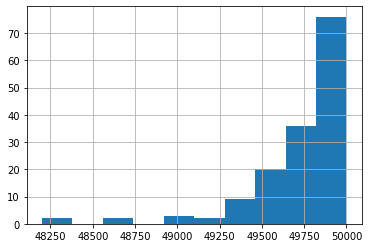

In [18]:
df_optimal['salary'].hist();

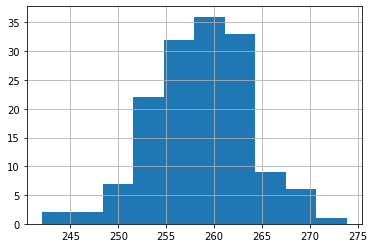

In [19]:
df_optimal['mean'].hist();

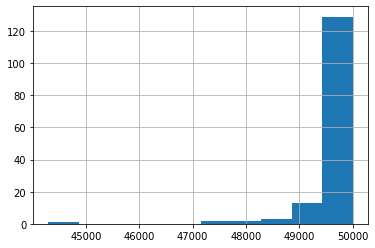

In [14]:
df_optimal['salary'].hist();

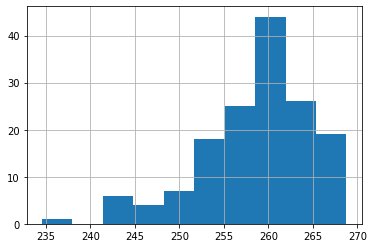

In [15]:
df_optimal['mean'].hist();

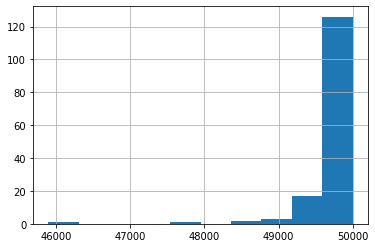

In [10]:
df_optimal['salary'].hist();

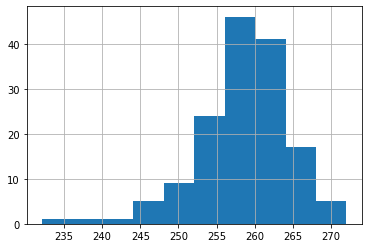

In [11]:
df_optimal['mean'].hist();

In [25]:
df_optimal = {}
for j in range(10):
    df_optimal[j+1] = gen.enforce_exposures2(
        var_multiple=1.0, 
        cov_penalty=0.001 * (j+1), 
        n_lineups_to_optimize=150,
        verbose=False
    )

Iteration 1 of 7
Iteration 2 of 7
Iteration 3 of 7
Iteration 4 of 7
Iteration 5 of 7
Iteration 6 of 7
Iteration 7 of 7
Iteration 1 of 7
Iteration 2 of 7
Iteration 3 of 7
Iteration 4 of 7
Iteration 5 of 7
Iteration 6 of 7
Iteration 7 of 7
Iteration 1 of 7
Iteration 2 of 7
Iteration 3 of 7
Iteration 4 of 7
Iteration 5 of 7
Iteration 6 of 7
Iteration 7 of 7
Iteration 1 of 7
Iteration 2 of 7
Iteration 3 of 7
Iteration 4 of 7
Iteration 5 of 7
Iteration 6 of 7
Iteration 7 of 7
Iteration 1 of 7
Iteration 2 of 7
Iteration 3 of 7
Iteration 4 of 7
Iteration 5 of 7
Iteration 6 of 7
Iteration 7 of 7
Iteration 1 of 7
Iteration 2 of 7
Iteration 3 of 7
Iteration 4 of 7
Iteration 5 of 7
Iteration 6 of 7
Iteration 7 of 7
Iteration 1 of 7
Iteration 2 of 7
Iteration 3 of 7
Iteration 4 of 7
Iteration 5 of 7
Iteration 6 of 7
Iteration 7 of 7
Iteration 1 of 7
Iteration 2 of 7
Iteration 3 of 7
Iteration 4 of 7
Iteration 5 of 7
Iteration 6 of 7
Iteration 7 of 7
Iteration 1 of 7
Iteration 2 of 7
Iteration 3 of

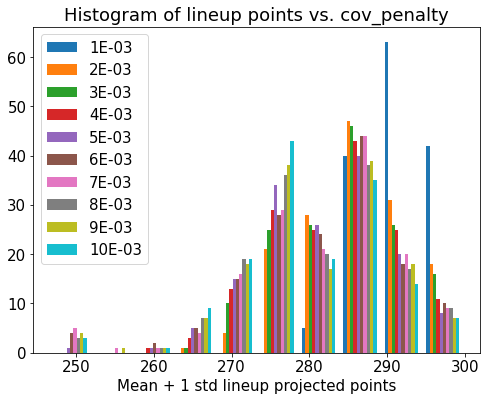

In [36]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 15
plt.hist(
    [df_optimal[j+1]['mean'] + df_optimal[j+1]['std'] for j in range(10)], 
    label=[str(j+1) + 'E-03' for j in range(10)])
plt.xlabel('Mean + 1 std lineup projected points')
plt.title('Histogram of lineup points vs. cov_penalty')
plt.legend()
plt.show()

In [37]:
df_exp = pd.concat([gen.get_player_distribution(df_optimal[j+1]) for j in range(10)], axis=1)

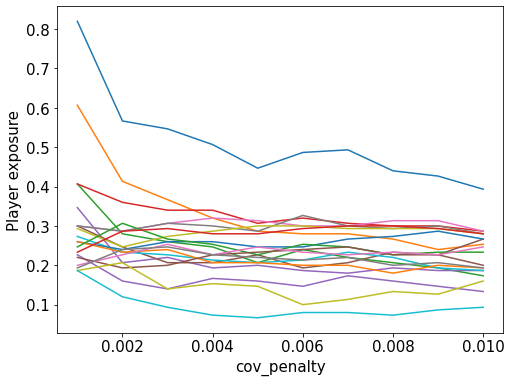

In [48]:
plt.plot([1E-03 * (j+1) for j in range(10)], df_exp[:20].T)
plt.xlabel('cov_penalty')
plt.ylabel('Player exposure')
plt.show()

## cov_penalty = 0.1

<AxesSubplot:>

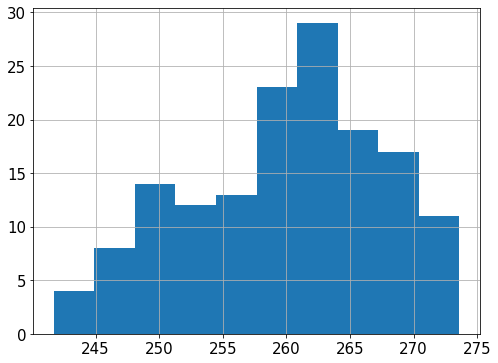

In [49]:
import matplotlib.pyplot as plt
df_optimal[3]['mean'].hist()

In [20]:
gen.get_player_distribution(df_optimal)

Anthony Davis               0.393333
LeBron James                0.393333
Luka Doncic                 0.353333
DeMar DeRozan               0.340000
Dejounte Murray             0.333333
Patty Mills                 0.326667
CJ McCollum                 0.320000
Keldon Johnson              0.313333
Dennis Schroder             0.313333
Dorian Finney-Smith         0.293333
Gordon Hayward              0.286667
LaMelo Ball                 0.280000
James Johnson               0.273333
Nicolas Batum               0.266667
Kawhi Leonard               0.266667
PJ Washington               0.266667
Bismack Biyombo             0.260000
Jakob Poeltl                0.240000
Devonte' Graham             0.240000
Luke Kennard                0.206667
Robert Covington            0.193333
Jusuf Nurkic                0.173333
Jalen Brunson               0.166667
Trey Lyles                  0.160000
Damian Lillard              0.153333
Rudy Gay                    0.146667
Trey Burke                  0.146667
P

## cov_penalty = 0.01

(239.0, 275.5)

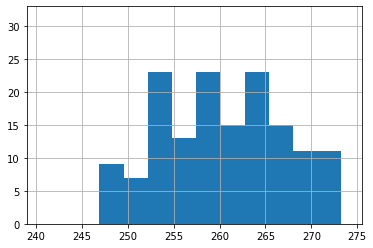

In [42]:

df_optimal['mean'].hist()
plt.ylim([0, 33])
plt.xlim([239, 275.5])

In [43]:
gen.get_player_distribution(df_optimal)

LeBron James                0.446667
Kawhi Leonard               0.420000
PJ Washington               0.373333
DeMar DeRozan               0.353333
CJ McCollum                 0.346667
Luka Doncic                 0.346667
Patty Mills                 0.340000
Dejounte Murray             0.313333
Jalen Brunson               0.306667
Keldon Johnson              0.300000
Dennis Schroder             0.286667
Jakob Poeltl                0.273333
Robert Covington            0.266667
Anthony Davis               0.253333
Trey Lyles                  0.246667
Luke Kennard                0.246667
Devonte' Graham             0.233333
Nicolas Batum               0.233333
Jusuf Nurkic                0.226667
Dorian Finney-Smith         0.226667
James Johnson               0.220000
Gordon Hayward              0.213333
Paul George                 0.193333
Bismack Biyombo             0.173333
Damian Lillard              0.146667
Josh Richardson             0.126667
Lonnie Walker IV            0.120000
R

(239.0, 275.5)

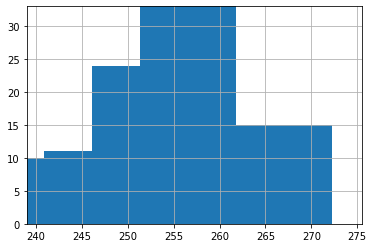

In [64]:
df_optimal['mean'].hist()
plt.ylim([0, 33])
plt.xlim([239, 275.5])

In [65]:
gen.get_player_distribution(df_optimal)

LeBron James                0.453333
Luka Doncic                 0.353333
Kawhi Leonard               0.353333
DeMar DeRozan               0.306667
Lonnie Walker IV            0.300000
Dejounte Murray             0.300000
Anthony Davis               0.273333
PJ Washington               0.266667
Keldon Johnson              0.260000
Miles Bridges               0.260000
CJ McCollum                 0.240000
Enes Kanter                 0.233333
Patty Mills                 0.226667
Luke Kennard                0.220000
Dennis Schroder             0.220000
Jalen Brunson               0.206667
Nicolas Batum               0.206667
Trey Lyles                  0.193333
Damian Lillard              0.193333
Bismack Biyombo             0.186667
Gordon Hayward              0.186667
Jusuf Nurkic                0.173333
James Johnson               0.160000
Robert Covington            0.160000
Montrezl Harrell            0.153333
Tim Hardaway Jr.            0.146667
Paul George                 0.146667
R

## cov_penalty = 0.001

(239.0, 275.5)

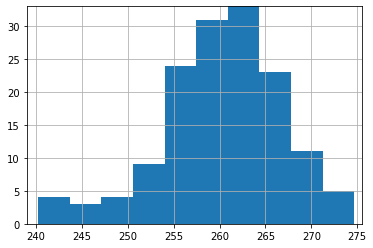

In [46]:
df_optimal['mean'].hist()
plt.ylim([0, 33])
plt.xlim([239, 275.5])

In [47]:
gen.get_player_distribution(df_optimal)

LeBron James           0.486667
PJ Washington          0.420000
Jakob Poeltl           0.366667
Kawhi Leonard          0.353333
Luka Doncic            0.353333
Patty Mills            0.340000
Dejounte Murray        0.333333
DeMar DeRozan          0.313333
Keldon Johnson         0.313333
Dennis Schroder        0.306667
Devonte' Graham        0.293333
Anthony Davis          0.280000
Luke Kennard           0.273333
James Johnson          0.253333
Nicolas Batum          0.253333
Bismack Biyombo        0.246667
Dorian Finney-Smith    0.240000
Jusuf Nurkic           0.233333
LaMelo Ball            0.226667
Trey Lyles             0.206667
CJ McCollum            0.193333
Gordon Hayward         0.180000
Robert Covington       0.173333
Josh Richardson        0.160000
Serge Ibaka            0.153333
Paul George            0.140000
Jalen Brunson          0.133333
Rudy Gay               0.126667
Damian Lillard         0.120000
Terry Rozier           0.113333
Trey Burke             0.086667
Lonnie W

(239.0, 275.5)

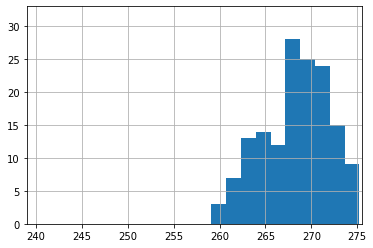

In [60]:
df_optimal['mean'].hist()
plt.ylim([0, 33])
plt.xlim([239, 275.5])

In [61]:
gen.get_player_distribution(df_optimal)

LeBron James           0.866667
DeMar DeRozan          0.726667
Jakob Poeltl           0.513333
Dejounte Murray        0.413333
Luke Kennard           0.393333
Kawhi Leonard          0.353333
Patty Mills            0.313333
James Johnson          0.306667
CJ McCollum            0.306667
Bismack Biyombo        0.293333
Dennis Schroder        0.286667
PJ Washington          0.253333
Jalen Brunson          0.240000
Keldon Johnson         0.213333
Luka Doncic            0.213333
Devonte' Graham        0.206667
Robert Covington       0.206667
LaMelo Ball            0.200000
Anthony Davis          0.200000
Dorian Finney-Smith    0.180000
Nicolas Batum          0.173333
Jusuf Nurkic           0.160000
Josh Richardson        0.153333
Trey Lyles             0.140000
Trey Burke             0.126667
Gordon Hayward         0.113333
Serge Ibaka            0.086667
Damian Lillard         0.080000
Rudy Gay               0.073333
Lonnie Walker IV       0.046667
Carmelo Anthony        0.046667
Enes Kan

## cov_penalty = 0.0001

(239.0, 275.5)

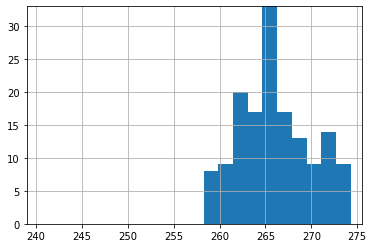

In [35]:
df_optimal['mean'].hist()
plt.ylim([0, 33])
plt.xlim([239, 275.5])

In [34]:
gen.get_player_distribution(df_optimal)

LeBron James           0.640000
Dejounte Murray        0.540000
DeMar DeRozan          0.526667
Jakob Poeltl           0.460000
CJ McCollum            0.413333
Anthony Davis          0.360000
Dennis Schroder        0.353333
Keldon Johnson         0.340000
Jusuf Nurkic           0.333333
Kawhi Leonard          0.326667
LaMelo Ball            0.326667
Dorian Finney-Smith    0.306667
Luke Kennard           0.306667
Patty Mills            0.293333
Robert Covington       0.273333
PJ Washington          0.266667
Jalen Brunson          0.246667
James Johnson          0.233333
Bismack Biyombo        0.213333
Luka Doncic            0.186667
Devonte' Graham        0.173333
Nicolas Batum          0.160000
Josh Richardson        0.153333
Trey Lyles             0.126667
Serge Ibaka            0.086667
Gordon Hayward         0.086667
Rudy Gay               0.086667
Damian Lillard         0.053333
Trey Burke             0.046667
Lonnie Walker IV       0.033333
Paul George            0.026667
Lou Will

In [9]:
sheet_name = 'test_DKEntries.csv'
# entries = EntriesHandler('../data/raw/' + sheet_name, gen.df, read_lineups=True)
entries = EntriesHandler('../data/raw/' + sheet_name, gen.df, read_lineups=False)
entries.add_lineups_to_entries(df_optimal, version='gen') ## Fast opt lineups
pd.read_csv('../data/raw/test_DKEntries_gen.csv')

,Entry ID,Contest Name,Contest ID,Entry Fee,PG,SG,SF,PF,C,G,F,UTIL,dk_points_actual
0,1809803072,NBA $12K mini-MAX [150 Entry Max],83787211,$0.50,16067348,16067332,16067181,16067210,16067198,16067359,16067186,16067218,252.30
1,1809803073,NBA $12K mini-MAX [150 Entry Max],83787211,$0.50,16067244,16067348,16067181,16067210,16067198,16067359,16067186,16067286,262.39
2,1809803074,NBA $12K mini-MAX [150 Entry Max],83787211,$0.50,16067181,16067431,16067186,16067210,16067198,16067244,16067392,16067218,266.05
3,1809803075,NBA $12K mini-MAX [150 Entry Max],83787211,$0.50,16067244,16067348,16067181,16067156,16067198,16067359,16067378,16067218,240.97
4,1809803076,NBA $12K mini-MAX [150 Entry Max],83787211,$0.50,16067244,16067348,16067181,16067210,16067198,16067359,16067235,16067218,255.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1809803217,NBA $12K mini-MAX [150 Entry Max],83787211,$0.50,16067181,16067348,16067186,16067210,16067399,16067304,16067138,16067406,251.26
146,1809803218,NBA $12K mini-MAX [150 Entry Max],83787211,$0.50,16067181,16067348,16067186,16067210,16067406,16067138,16067354,16067362,251.84
147,1809803219,NBA $12K mini-MAX [150 Entry Max],83787211,$0.50,16067304,16067435,16067210,16067198,16067128,16067359,16067362,16067218,222.67
148,1809803220,NBA $12K mini-MAX [150 Entry Max],83787211,$0.50,16067304,16067431,16067210,16067198,16067128,16067359,16067362,16067218,221.17
